In [298]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn




In [299]:
df=pd.read_csv('C:\\Users\\jasim\\Desktop\\Capstone2.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('id', inplace=True)

In [300]:
#df.describe()

In [369]:
#Variable 'price', 'sqft_living' values are really large and will affect the absolute numbers of the regression model. 
#I will normalise the data using log

df['price'] = np.log(df['price'])
df['sqft_living'] = np.log(df['sqft_living'])





In [370]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2.567818,3.370842,2.114757,2.020000,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.040124,0.930062,0.770163,0.056540,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,2.418165,0.000000,0.000000,1.735168,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.540196,3.000000,1.750000,1.982838,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2.566256,3.000000,2.250000,2.022191,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2.593537,4.000000,2.500000,2.059730,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2.763594,33.000000,8.000000,2.252702,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [371]:
#check for missing or null values in the data set. Looks like everything is in place.

In [372]:
null= df.isnull()

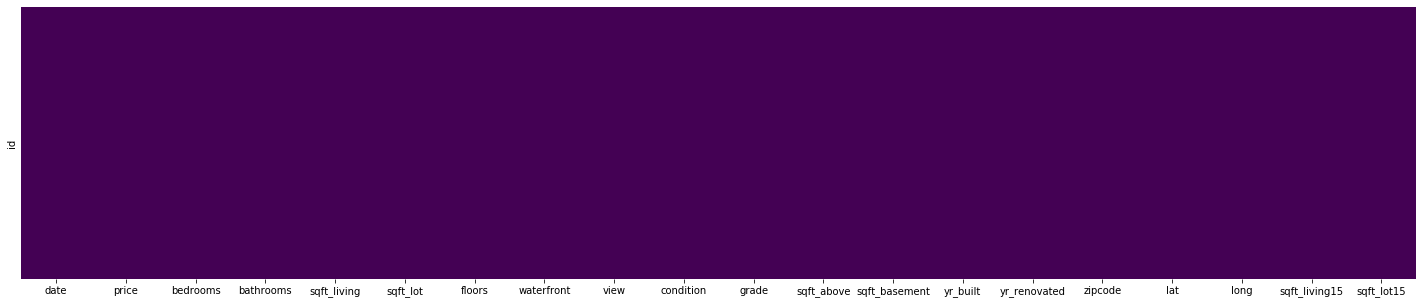

In [373]:
sns.heatmap(null,cbar=False,cmap='viridis',yticklabels=False)


In [374]:
#there is no missing values

In [375]:
#I created a coorelation matrix to check which variables are strongerly correlated with the target variable 'price'

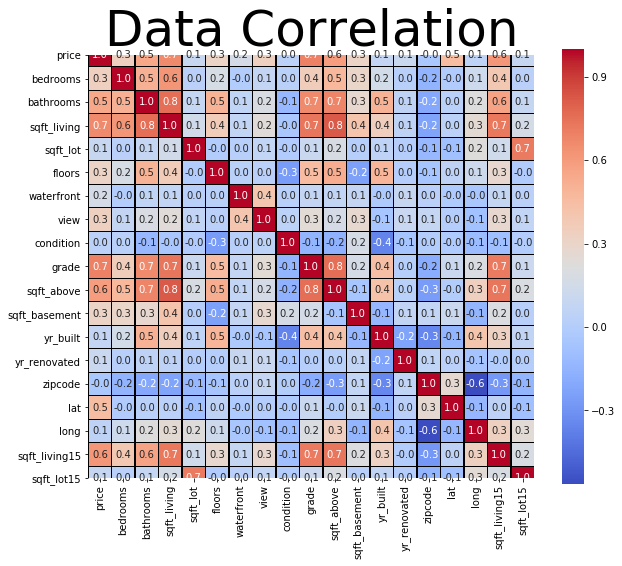

In [376]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(method='pearson'),annot=True,linecolor="black",cmap='coolwarm',fmt="1.1f", linewidths=0.25, vmax=1.0, square=True)
plt.title("Data Correlation",fontsize=50)
plt.show()


In [377]:
#Data Visulations 

In [378]:
#Let's have a look at the different variables and their relation with the target variable 'price'

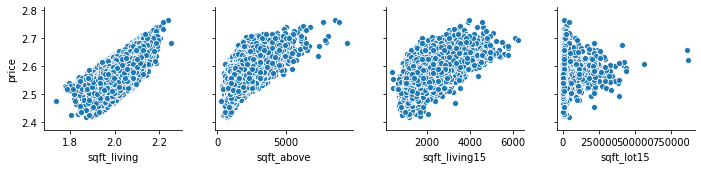

In [379]:
filter = ['sqft_living','sqft_above','sqft_living15', 'sqft_lot15']
sns.pairplot(data=df, x_vars=['sqft_living','sqft_above','sqft_living15', 'sqft_lot15'],y_vars='price',kind='scatter')
plt.show()

In [380]:
#sqft_living has a stronger correlation with the price as compare to other variables. Lets focus on sqft_living

<Figure size 576x360 with 0 Axes>

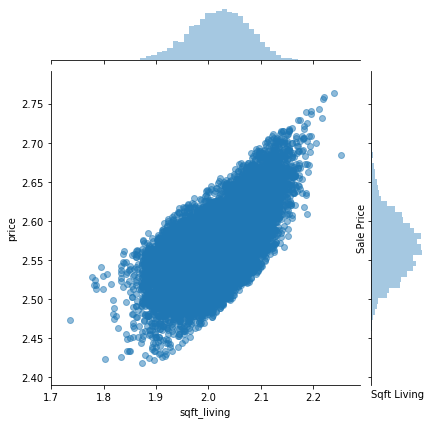

In [381]:
plt.figure(figsize = (8, 5))
sns.jointplot(x='sqft_living', y='price',data=df, 
              alpha = 0.5,)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

In [382]:
#Let's check the 'zipcode' variable and important zip code is on sqft_living and price relation

In [383]:
df["zipcode"].nunique()

70

In [384]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [385]:
#zip code 98103 has most of houses sold 

In [386]:
df.groupby('zipcode')['price'].mean().reset_index().sort_values('price',ascending=False)

,zipcode,price
24,98039,2.671578
3,98004,2.639163
25,98040,2.631698
48,98112,2.622553
47,98109,2.608499
...,...,...
13,98023,2.526403
0,98001,2.524702
20,98032,2.517288
64,98168,2.512883


In [387]:
#Most expensive zipcode is 98039

In [388]:
#let's plot sqft_living  for both the zipcodes

In [389]:
zip98103 = df['zipcode'] == 98103 
zip98039 = df['zipcode'] == 98039

<Figure size 576x360 with 0 Axes>

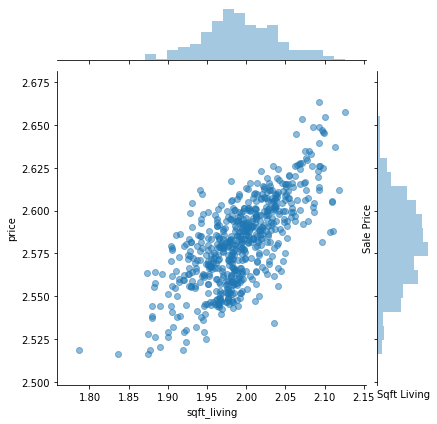

In [390]:
plt.figure(figsize = (8, 5))
sns.jointplot(x='sqft_living', y='price',data=df[zip98103], 
              alpha = 0.5,)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

In [391]:
#Plot of sqft_living vs pirce for zipcode 98103 is almost similar with the original plot for all zipcode. 

<Figure size 576x360 with 0 Axes>

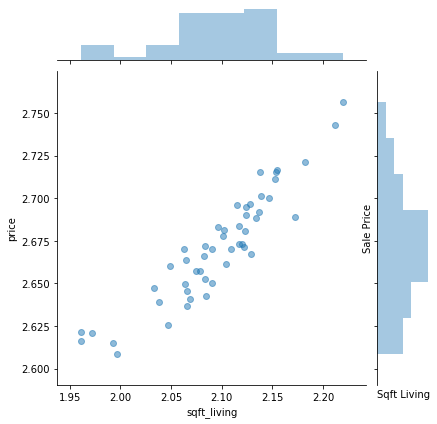

In [392]:
plt.figure(figsize = (8, 5))
sns.jointplot(x='sqft_living', y='price',data=df[zip98039], 
              alpha = 0.5,)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

In [393]:
#Zipcode 98039 has an interesting plot. Sqft_living vs price for this zipcode has a strong positive correlation. 
# we will only include zipcode 98039 in our prediction model to get a better result

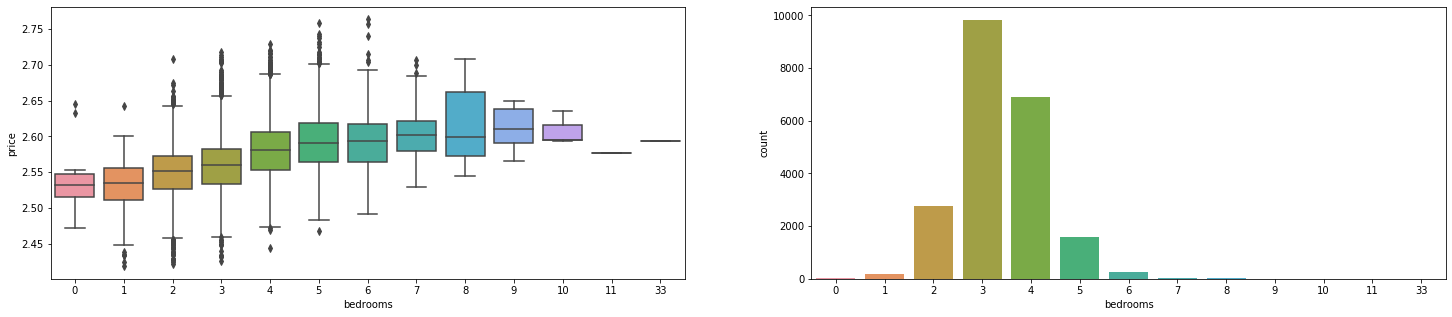

In [394]:
f, axes = plt.subplots(1, 2, figsize=(25,5))
sns.countplot(x='bedrooms' , data=df, ax=axes[1])
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[0])

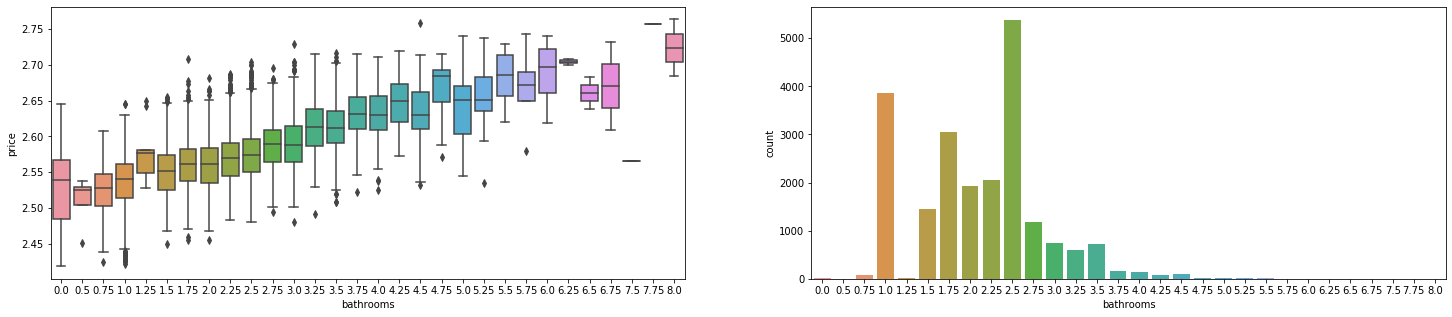

In [395]:
f, axes = plt.subplots(1, 2, figsize=(25,5))
sns.countplot(x='bathrooms' , data=df, ax=axes[1])
sns.boxplot(x='bathrooms', y='price', data=df, ax=axes[0])

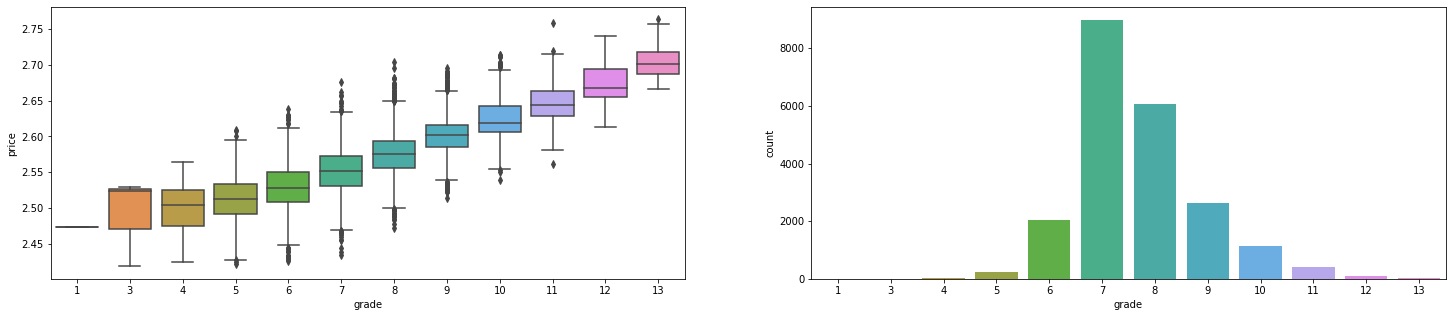

In [396]:
f, axes = plt.subplots(1, 2, figsize=(25,5))
sns.countplot(x='grade' , data=df, ax=axes[1])
sns.boxplot(x='grade', y='price', data=df, ax=axes[0])

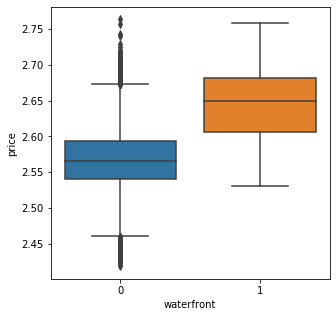

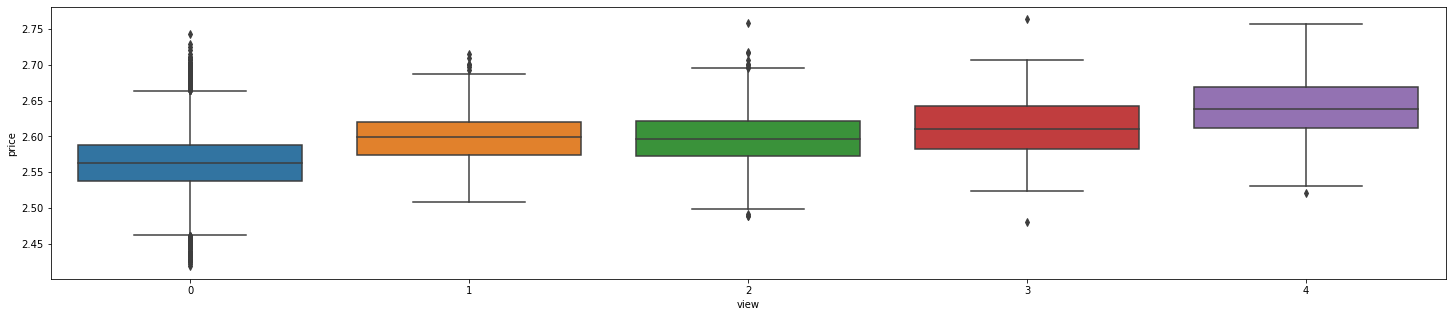

In [397]:
f, axes = plt.subplots(1, 1, figsize=(5,5))
sns.boxplot(x='waterfront',y='price' , data=df)
plt.show()
sns.boxplot(x='view', y='price', data=df)

In [398]:
#Let's check the 'zipcode' variable and how it is correlated with the 'price'

<Figure size 576x360 with 0 Axes>

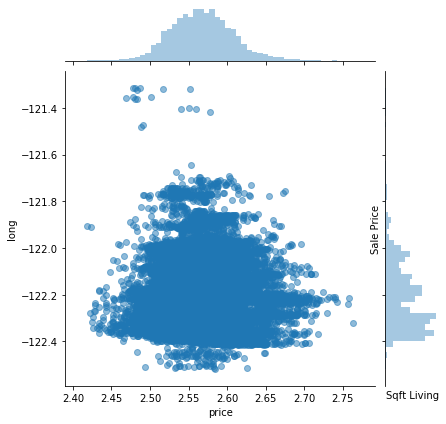

In [399]:
plt.figure(figsize = (8, 5))
sns.jointplot(y='long', x='price',data=df, 
              alpha = 0.5,)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

In [400]:
# HOUSE PREDICTIONS

In [401]:
#Now we will use some model to Predict house prices.

In [402]:
#First we try to run Linear Regression model to predict the prices

features1 = ['sqft_living','grade', 'bathrooms','sqft_above','sqft_living15','lat','sqft_lot15']
features2= ['sqft_living','grade', 'bathrooms','sqft_above','sqft_living15','lat','view','bedrooms','condition']
features3 =['sqft_living','grade', 'bathrooms','sqft_above','sqft_living15','lat','view','bedrooms','condition','yr_built','sqft_lot15','floors','waterfront','zipcode']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression








In [403]:
x= df[features1]
y=df['price']

In [404]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

In [405]:
lm=LinearRegression()

In [406]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [407]:
Score1=lm.score(X_test, y_test)

In [408]:
round(Score1,2)

0.71

In [409]:
# The predicition score for feature 1 is 71% which is weak so we will try feature 2.

In [410]:
x= df[features2]
y=df['price']


In [411]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

In [412]:
lm=LinearRegression()

In [413]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [414]:
Score2=lm.score(X_test, y_test)

In [415]:
round(Score2,2)

0.74

In [416]:
# The predicition score for feature 2 is 74% . Let see what will be the score with feature3?

In [417]:
x= df[features3]
y=df['price']


In [418]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

In [419]:
lm=LinearRegression()

In [420]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [421]:
Score3=lm.score(X_test, y_test)

In [422]:
round(Score3,2)

0.77

In [423]:
# The predicition score for feature 3 is 77% which is stronger than previous two features so we will use this for predicition.

In [424]:
print(lm.intercept_)

0.5362835251208198


In [425]:
lm.coef_

array([ 1.73570994e-01,  1.23092511e-02,  6.13865971e-03,  5.60179546e-07,
        6.86740071e-06,  1.08572103e-01,  4.72382319e-03, -1.74277443e-03,
        4.31088745e-03, -3.04713467e-04,  1.64148752e-08,  5.01545698e-03,
        2.95564994e-02, -3.08119043e-05])

In [426]:
pd.DataFrame(lm.coef_,x.columns, columns=['coef'])

,coef
sqft_living,1.735710e-01
grade,1.230925e-02
bathrooms,6.138660e-03
sqft_above,5.601795e-07
sqft_living15,6.867401e-06
lat,1.085721e-01
view,4.723823e-03
bedrooms,-1.742774e-03
condition,4.310887e-03
yr_built,-3.047135e-04


In [427]:
Prediction1=lm.predict(X_test)

In [428]:
Prediction1

array([2.53887701, 2.52815663, 2.56912261, ..., 2.59175905, 2.54683624,
       2.58667792])

In [429]:
y_test

id
8669180390    2.530537
3750603471    2.516743
5112800291    2.567943
6046400465    2.556681
9126100608    2.580864
                ...   
8068000585    2.515059
3797000745    2.574318
5451200520    2.613959
3601200465    2.544488
4100000040    2.608396
Name: price, Length: 4323, dtype: float64

In [430]:
from sklearn import metrics


In [431]:
round(metrics.mean_absolute_error(y_test, Prediction1),2)

0.02

In [432]:
round(metrics.mean_squared_error(y_test, Prediction1),2)

0.0

In [435]:
round(np.sqrt(metrics.mean_squared_error(y_test, Prediction1)),2)

0.02

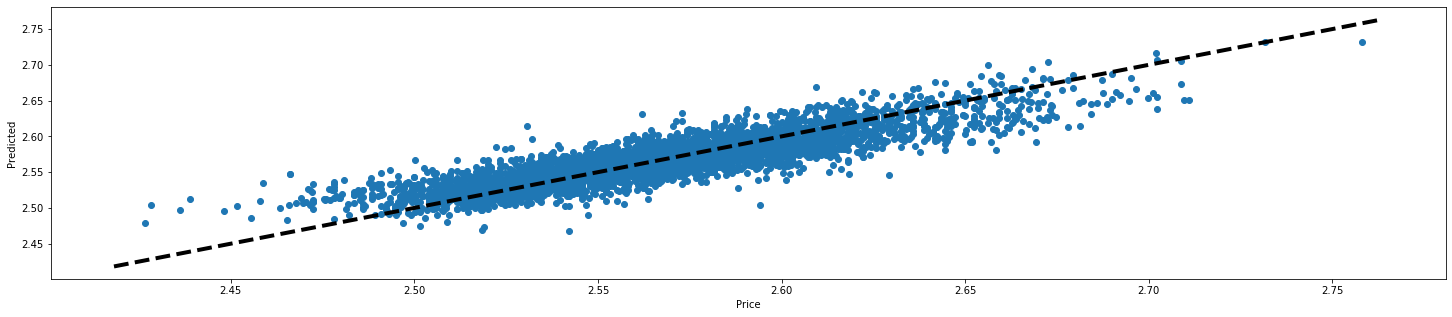

In [436]:
fig, ax = plt.subplots()
ax.scatter(y_test, Prediction1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Price')
ax.set_ylabel('Predicted')
plt.show()
plt.rcParams['figure.figsize'] = (25,5)

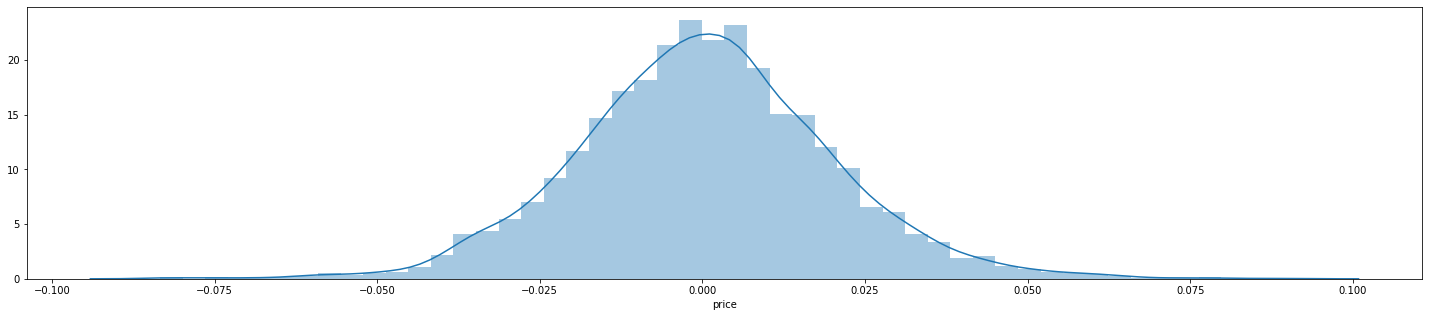

In [437]:
sns.distplot((y_test-Prediction1))

In [438]:
compare = pd.DataFrame({'Prediction': Prediction1, 'Test Data' : y_test})
compare.head(10)

,Prediction,Test Data
id,,
8669180390,2.538877,2.530537
3750603471,2.528157,2.516743
5112800291,2.569123,2.567943
6046400465,2.563379,2.556681
9126100608,2.574507,2.580864
2621750280,2.552648,2.551094
3448001975,2.546696,2.546984
6392002635,2.580893,2.587361
2174503500,2.551698,2.581555
